In [1]:
import numpy as np
import pandas as pd
import find_split as fs
import evaluation as ev
import matplotlib.pyplot as plt
import trees

In [2]:
data = np.loadtxt('noisy_dataset.txt')
print(data[:5])

[[-59. -53. -51. -54. -45. -79. -87.   4.]
 [-66. -53. -59. -62. -69. -81. -79.   1.]
 [-41. -57. -63. -40. -73. -66. -65.   2.]
 [-62. -58. -52. -63. -50. -87. -88.   4.]
 [-63. -58. -64. -67. -74. -87. -87.   4.]]


In [3]:
#training the tree
decisionTree=trees.binarySearchTree(data)
print('Max depth is',decisionTree.get_max_depth())

Max depth is 18


In [4]:
#just to test, predict the entire training set's labels
train_pred=decisionTree.predict(data[:,:-1])
train_pred

array([4, 1, 2, ..., 1, 3, 3])

In [5]:
#actual labels
data[:,-1]

array([4., 1., 2., ..., 1., 3., 3.])

In [6]:
#check if every label predicted is same as actual label and hence our model is working perfectly
print(np.all(train_pred==data[:,-1]))

True


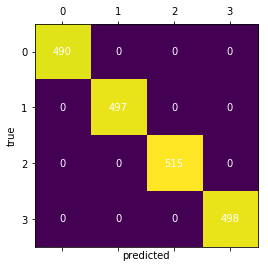

avg recall precision (1.0, 1.0)
avg classification rate 1.0


In [7]:
cm=ev.confusion_matrix(data[:,-1],train_pred,plot=True)
print('avg recall precision',ev.avg_recall_precision(cm))
print('avg classification rate',ev.avg_classification_rate(cm))

In [8]:
#testing a training set and test set using a 70:30 split
data2=data.copy()
#shuffle data
np.random.shuffle(data2)
split=0.7
train=data2[:int(len(data2)*split)]
test=data2[int(len(data2)*split):]

model=trees.binarySearchTree(train)
print('Max depth is',model.get_max_depth())

Max depth is 18


In [9]:
#get prediction
y_pred=model.predict(test[:,:-1])

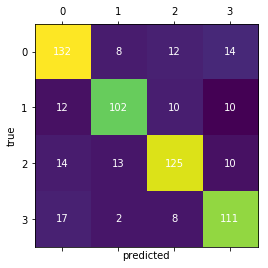

[[132, 12, 14, 17], [8, 102, 13, 2], [12, 10, 125, 8], [14, 10, 10, 111]]
avg recall precision (0.7855636421420626, 0.7855636421420626)
avg classification rate 0.7833333333333333


In [10]:
#evaluate
cm=ev.confusion_matrix(test[:,-1],y_pred,plot=True)
print(cm)
print('avg recall precision',ev.avg_recall_precision(cm))
print('avg classification rate',ev.avg_classification_rate(cm))

In [23]:
#testing the limit 
data2=data.copy()
#shuffle data
np.random.shuffle(data2)
split=0.7
train=data2[:int(len(data2)*split)]
test=data2[int(len(data2)*split):]

model2=trees.binarySearchTree(train,limit=4)
print('Max depth is',model2.get_max_depth())

Max depth is 4


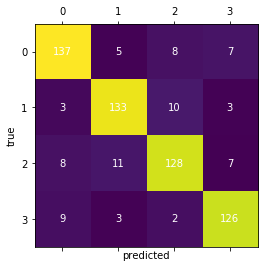

[[137, 3, 8, 9], [5, 133, 11, 3], [8, 10, 128, 2], [7, 3, 7, 126]]
avg recall precision (0.8733988027379748, 0.8733988027379748)
avg classification rate 0.8733333333333333


In [24]:
y_pred=model2.predict(test[:,:-1])
cm=ev.confusion_matrix(test[:,-1],y_pred,plot=True)
print(cm)
print('avg recall precision',ev.avg_recall_precision(cm))
print('avg classification rate',ev.avg_classification_rate(cm))